In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries.csv')

In [3]:
sal.head(5)

,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
1,position3,7,0,0,320,120,92000,Woman,False,Other,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
2,position3,4,0,0,25,15,88000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
3,position5,0,0,0,5,0,75000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
4,position18,0,0,0,0,0,67000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution


In [4]:
sal.mean()

sup1                       1.425292
sup2                       0.737549
sup3                       0.600693
sup4                      49.776527
sup5                       4.090515
salary                 49234.686712
disabled                   0.012993
yearsInPosition            5.690508
yearsInProfession          9.331236
age                       38.257220
cred1                      0.067129
cred2                      0.031615
inst1                     16.575574
inst2                      6.470333
inst3                      3.541793
inst4                    334.433088
inst5                     41.038545
instBudget           4751711.388732
instSize               25066.208858
dtype: float64

In [5]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
         'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
X_categorical = sal2[X_categorical_features]

In [7]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['Function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
print(gender_dummies)
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
Category_dummies = pd.get_dummies(X_categorical['Category'])
instType_dummies = pd.get_dummies(X_categorical['instType'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

      Man  Woman
0       0      1
1       0      1
2       0      1
3       0      1
4       0      1
5       1      0
6       1      0
7       1      0
8       0      1
9       0      1
10      1      0
11      0      1
12      0      1
13      1      0
14      0      1
15      0      1
16      0      1
17      1      0
18      0      1
19      0      1
20      0      1
21      0      1
22      0      1
23      0      1
24      1      0
25      1      0
26      0      1
27      0      1
28      0      1
29      1      0
...   ...    ...
2279    0      0
2280    0      0
2281    0      0
2282    1      0
2283    1      0
2284    1      0
2285    1      0
2286    1      0
2287    1      0
2288    1      0
2289    1      0
2290    1      0
2291    1      0
2292    0      1
2293    1      0
2294    1      0
2295    1      0
2296    1      0
2297    1      0
2298    0      1
2299    0      1
2300    1      0
2301    0      1
2302    1      0
2303    1      0
2304    0      1
2305    0     

In [8]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [9]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [10]:
# y is salary
y = sal2.iloc[:, 6].values

In [11]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [12]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [13]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 24679.719515
Coefficients: 
 [  7.04704753e+03  -4.89849023e+03  -6.15011258e+03  -5.76475010e+03
  -3.15999126e+03   4.85176884e+03  -6.56116978e+03  -5.92907310e+03
  -4.44512339e+03  -1.24785493e+02  -2.47448813e+03  -3.14042551e+03
  -7.51586873e+03  -7.18537599e+03  -5.50007990e+03  -9.68622359e+02
  -5.97170350e+03  -1.25333607e+04  -1.78642150e+03  -4.43590256e+03
  -4.31442558e+03   1.38041103e+03  -5.40497688e+03  -1.39662437e+03
  -5.73739071e+03  -3.83429613e+03  -2.56743303e+03  -7.09593415e+03
   1.42123126e+03   1.65266909e+02   2.17224951e+03   8.06448080e+03
   7.25990301e+03   4.80258179e+03   1.62709106e+03   6.57256825e+03
   3.16786820e+03   7.41347900e+02   5.09314855e+03   1.38008012e+04
   7.54412417e+03  -6.15583907e+02   5.07276292e+03  -5.07276292e+03
  -5.60522580e+03  -6.30844620e+03   1.86015844e+03   6.54297733e+02
  -5.74364074e+01   1.12927165e+00  -1.34795734e+00   2.05537436e+02
   1.39682102e+02   3.71887603e+02   1.49764706e+02   2.09818

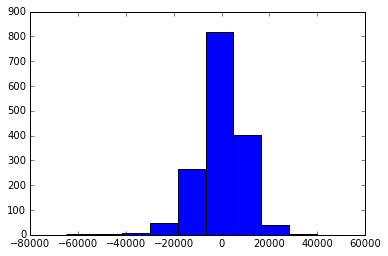

Distribution of prediction error on test data:


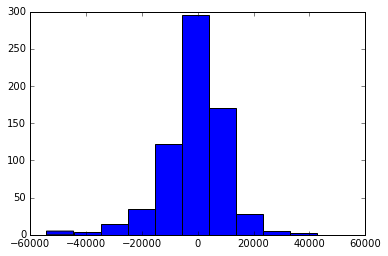

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [17]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 -9.20565234333e+17
Coefficients: 
 [  6.18389018e+17   2.61901766e+16   1.01045882e+17 ...,  -9.00551968e-12
  -5.95578407e-08   2.45517310e-06]
Residual sum of squares, training data: 27817653.42
Residual sum of squares, test data: 42974421569996612936928448846233600.00
Variance score, training data: 0.92
Distribution of prediction error on training data:


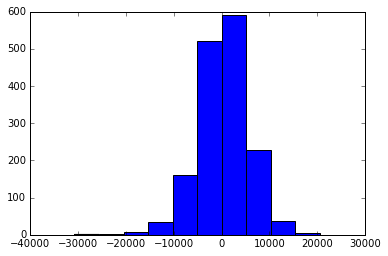

Distribution of prediction error on test data:


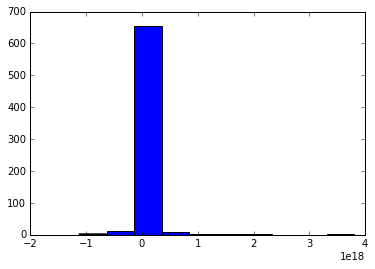

In [18]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 24096.7283525
Coefficients: 
 [  9.52951158e+03  -2.21366260e+03  -3.42145437e+03  -2.92193110e+03
  -4.69055025e+02   7.23635271e+03  -3.90886484e+03  -2.98338808e+03
  -1.70033004e+03   2.21233208e+03   1.87156551e+02  -5.32568540e+02
  -4.75308283e+03  -4.31612642e+03  -2.78979841e+03   1.26444679e+03
  -2.99335102e+03  -9.90620961e+03   6.32940117e+02  -1.65604697e+03
  -1.02165318e+03   3.95887890e+03  -2.70911788e+03   1.28426798e+03
  -3.03279101e+03  -1.14541278e+03   9.80661056e+01  -4.40290800e+03
   3.66364478e+03   2.41827951e+03  -1.93106413e+02   5.53238353e+03
   4.57912228e+03   2.49708815e+03  -6.64814654e+02   3.32089951e+03
   9.04064945e+02  -7.10445489e+02   3.55961374e+03   1.18488348e+04
   5.98763971e+03  -1.99177307e+03   4.83163200e+03  -4.83163200e+03
  -5.68908214e+03  -6.53617867e+03   1.87723945e+03   6.49733597e+02
  -5.04328147e+01   8.30717056e-01  -2.05371849e+00   1.38536827e+02
   1.34754356e+02   3.80079593e+02   1.47483379e+02   2.1782

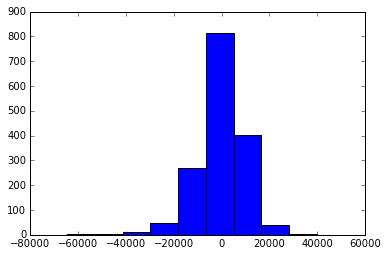

Distribution of prediction error on test data:


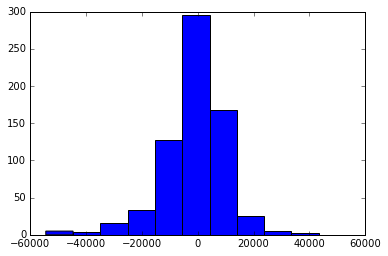

In [19]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

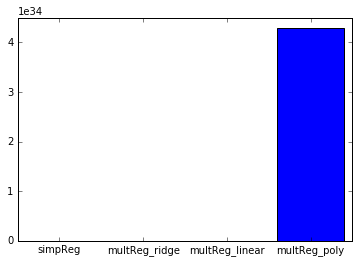

In [20]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()